In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [109]:
df= pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df.shape

(42000, 785)

In [111]:
import matplotlib.pyplot as plt

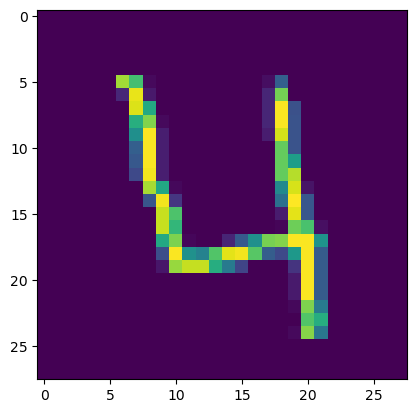

In [112]:
plt.imshow(df.iloc[3, 1:].values.reshape(28,28))

In [114]:
X= df.iloc[:,1:]
y= df.iloc[:, 0]

In [115]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2,random_state= 42)



In [117]:
X_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_train.shape

(33600, 784)

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn= KNeighborsClassifier()

In [121]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
import time
start= time.time()

y_pred= knn.predict(X_test)
print(time.time()-start)

14.68376874923706


In [123]:
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [125]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [126]:
sc

StandardScaler()

In [127]:
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [128]:
X_train.shape

(33600, 784)

In [129]:
X_test.shape

(8400, 784)

In [130]:
pca= PCA(n_components=100)
X_train_trf= pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [131]:
X_train_trf.shape

(33600, 100)

In [133]:
X_test_trf.shape

(8400, 100)

In [134]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [135]:
y_pred= knn.predict(X_test_trf)  

In [136]:
accuracy_score(y_test, y_pred)

0.9545238095238096

In [ ]:
for i in range(1,785):
    pca= PCA(n_components=i)
    X_train_trf= pca.fit_transform(X_train)
    X_test_trf= pca.transform(X_test)
    knn.fit(X_train_trf, y_train)
    y_pred= knn.predict(X_test_trf)  
    print("Accuracy_score is:"accuracy_score(y_test, y_pred))